In [ ]:
import json
import os
import matplotlib.pyplot as plt
from collections import Counter
from collections import defaultdict
import numpy as np
import ijson
import seaborn as sns



In [5]:
# Helper function to load JSON data from a file in the "data" directory
def load_json(filename):
    filepath = os.path.join("data", filename)
    with open(filepath, "r", encoding="utf-8") as f:
        return json.load(f)

# Load datasets (adjust filenames as needed)
dataset1 = load_json("arxiv_march_data.json")
dataset2 = load_json("arxiv_march_data_with_pdf.json")
dataset3 = load_json("arxiv_march_data_with_processed_summary.json")


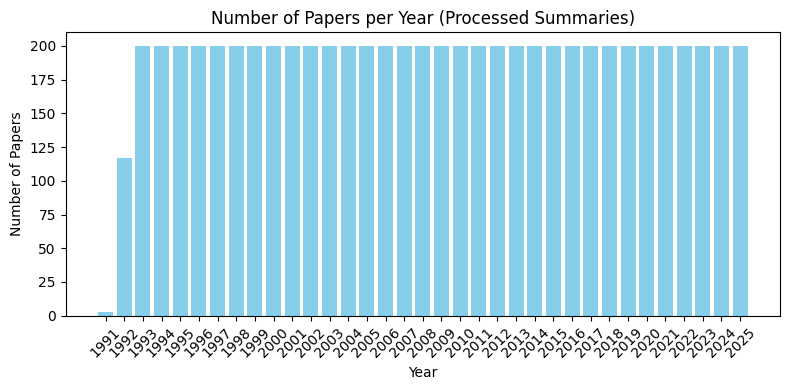

In [19]:

# -------------------------------------------------------------------
# Visualization 1: Number of Papers per Year (Dataset 3)
# -------------------------------------------------------------------
paper_counts = {}
for year, papers in dataset1.items():
    paper_counts[int(year)] = len(papers)

years_sorted = sorted(paper_counts.keys())
counts = [paper_counts[y] for y in years_sorted]

plt.figure(figsize=(8,4))
plt.bar(years_sorted, counts, color='skyblue')
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.title("Number of Papers per Year (Processed Summaries)")
plt.xticks(years_sorted, rotation=45)
plt.tight_layout()
plt.show()




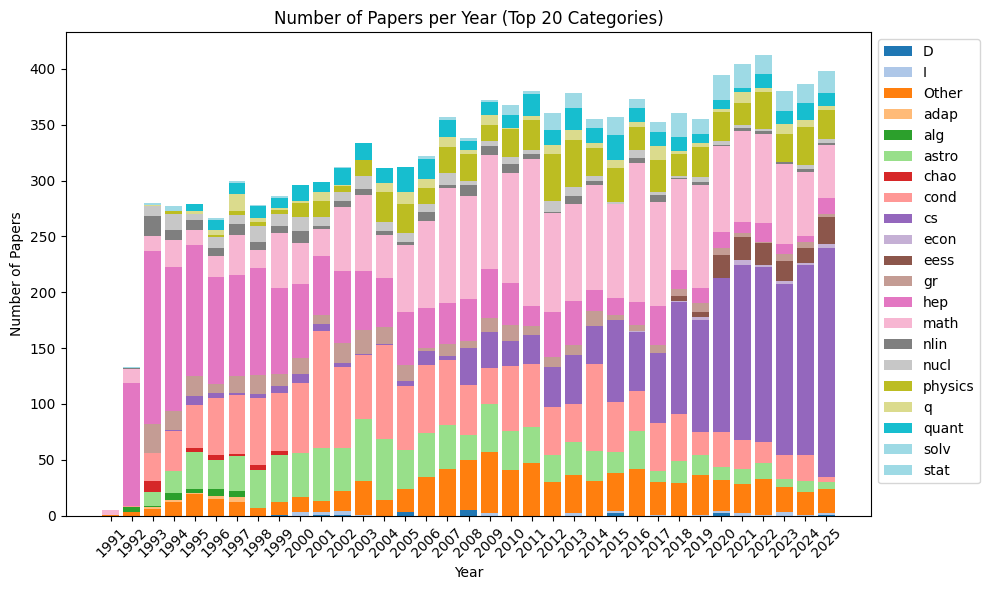

In [17]:
# Helper function to load JSON data from the "data" directory
def load_json(filename):
    filepath = os.path.join("data", filename)
    with open(filepath, "r", encoding="utf-8") as f:
        return json.load(f)

# Function to extract the main category (e.g., "math" from "math.DS" or "math-DS")
def get_main_category(category):
    return category.split('.')[0].split('-')[0]

# Load Dataset 1: raw arXiv metadata without PDFs
dataset1 = load_json("arxiv_march_data.json")

# Compute the number of papers per year per main category.
# Structure: {year: {main_category: count, ...}, ...}
counts_per_year = {}
for year, papers in dataset1.items():
    category_counts = defaultdict(int)
    for paper in papers:
        # Each paper may have multiple categories.
        for category in paper.get("categories", []):
            main_cat = get_main_category(category)
            category_counts[main_cat] += 1
    counts_per_year[year] = dict(category_counts)

# Compute overall counts across all years
overall_counts = Counter()
for cat_counts in counts_per_year.values():
    overall_counts.update(cat_counts)

# Select the top 20 categories overall
top_20 = set([cat for cat, _ in overall_counts.most_common(20)])

# For each year, keep only counts for the top 20 categories.
# Sum the counts of categories not in the top 20 into an "Other" category.
filtered_counts_per_year = {}
for year, cat_counts in counts_per_year.items():
    filtered = {}
    other_total = 0
    for cat, count in cat_counts.items():
        if cat in top_20:
            filtered[cat] = count
        else:
            other_total += count
    if other_total > 0:
        filtered["Other"] = other_total
    filtered_counts_per_year[year] = filtered

# Determine all categories to be plotted (top 20 plus "Other", if present)
all_categories = set()
for cat_counts in filtered_counts_per_year.values():
    all_categories.update(cat_counts.keys())
all_categories = sorted(list(all_categories))

# Create a sorted list of years
years = sorted(list(filtered_counts_per_year.keys()))

# Build data for each category across the years
data_by_category = {cat: [] for cat in all_categories}
for year in years:
    for cat in all_categories:
        data_by_category[cat].append(filtered_counts_per_year[year].get(cat, 0))

# Define a colormap and assign a distinct color to each category
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in range(len(all_categories))]

# Plot a stacked bar chart: x-axis is the years; each stack segment represents a main category.
x = np.arange(len(years))
bottom = np.zeros(len(years))

plt.figure(figsize=(10, 6))
for idx, cat in enumerate(all_categories):
    values = data_by_category[cat]
    plt.bar(x, values, bottom=bottom, label=cat, color=colors[idx])
    bottom += np.array(values)

plt.xticks(x, years, rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.title("Number of Papers per Year (Top 20 Categories)")
# Place the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

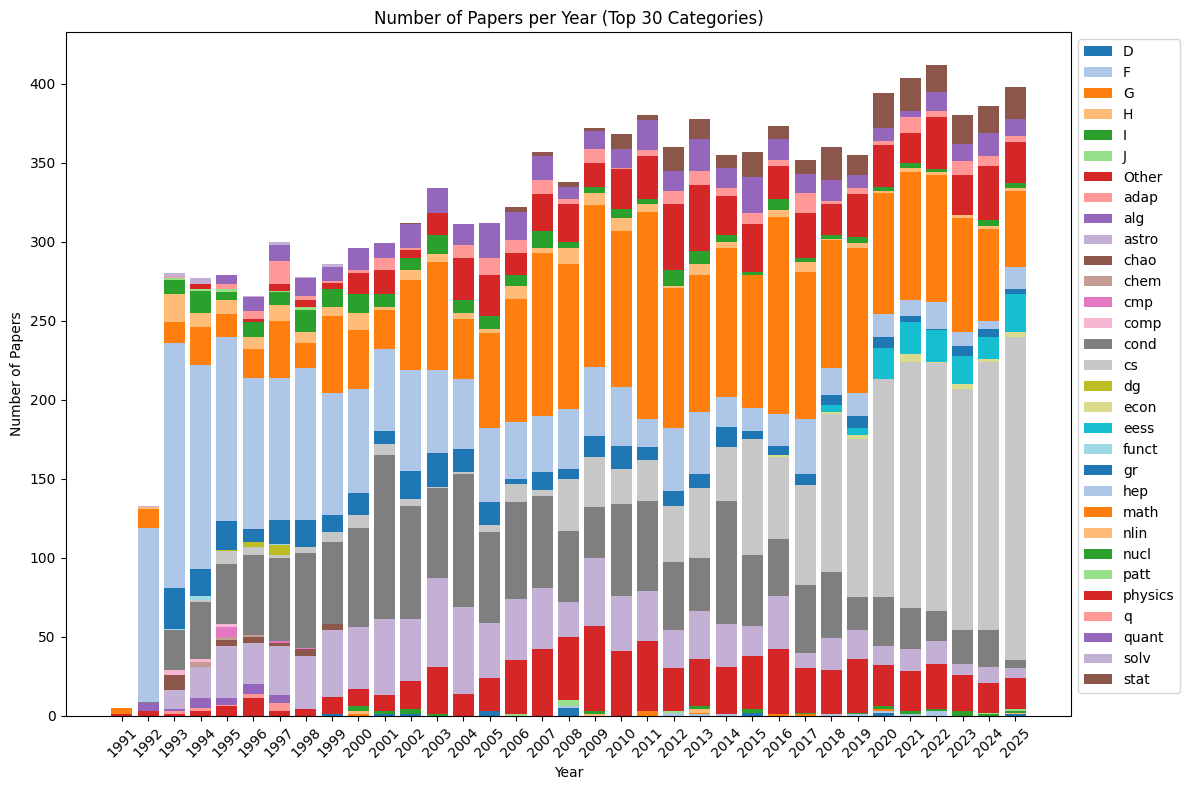

In [20]:
# Helper function to load JSON data from the "data" directory
def load_json(filename):
    filepath = os.path.join("data", filename)
    with open(filepath, "r", encoding="utf-8") as f:
        return json.load(f)

# Function to extract the main category (e.g., "math" from "math.DS" or "math-DS")
def get_main_category(category):
    return category.split('.')[0].split('-')[0]

# Load Dataset 1: raw arXiv metadata without PDFs
dataset1 = load_json("arxiv_march_data.json")

# Compute the number of papers per year per main category.
# Structure: {year: {main_category: count, ...}, ...}
counts_per_year = {}
for year, papers in dataset1.items():
    category_counts = defaultdict(int)
    for paper in papers:
        # Each paper may have multiple categories.
        for category in paper.get("categories", []):
            main_cat = get_main_category(category)
            category_counts[main_cat] += 1
    counts_per_year[year] = dict(category_counts)

# Compute overall counts across all years
overall_counts = Counter()
for cat_counts in counts_per_year.values():
    overall_counts.update(cat_counts)

# Select the top 30 categories overall
top_30 = set([cat for cat, _ in overall_counts.most_common(30)])

# For each year, keep only counts for the top 30 categories.
# Sum the counts of categories not in the top 30 into an "Other" category.
filtered_counts_per_year = {}
for year, cat_counts in counts_per_year.items():
    filtered = {}
    other_total = 0
    for cat, count in cat_counts.items():
        if cat in top_30:
            filtered[cat] = count
        else:
            other_total += count
    if other_total > 0:
        filtered["Other"] = other_total
    filtered_counts_per_year[year] = filtered

# Determine all categories to be plotted (top 30 plus "Other", if present)
all_categories = set()
for cat_counts in filtered_counts_per_year.values():
    all_categories.update(cat_counts.keys())
all_categories = sorted(list(all_categories))

# Create a sorted list of years
years = sorted(list(filtered_counts_per_year.keys()))

# Build data for each category across the years
data_by_category = {cat: [] for cat in all_categories}
for year in years:
    for cat in all_categories:
        data_by_category[cat].append(filtered_counts_per_year[year].get(cat, 0))

# Define a colormap and assign a distinct color to each category
cmap = plt.get_cmap('tab20')
# If there are more than 20 categories, you might want to use a different colormap or cycle colors.
colors = [cmap(i % 20) for i in range(len(all_categories))]

# Plot a stacked bar chart: x-axis is the years; each stack segment represents a main category.
x = np.arange(len(years))
bottom = np.zeros(len(years))

plt.figure(figsize=(12, 8))
for idx, cat in enumerate(all_categories):
    values = data_by_category[cat]
    plt.bar(x, values, bottom=bottom, label=cat, color=colors[idx])
    bottom += np.array(values)

plt.xticks(x, years, rotation=45)
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.title("Number of Papers per Year (Top 30 Categories)")
# Place the legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

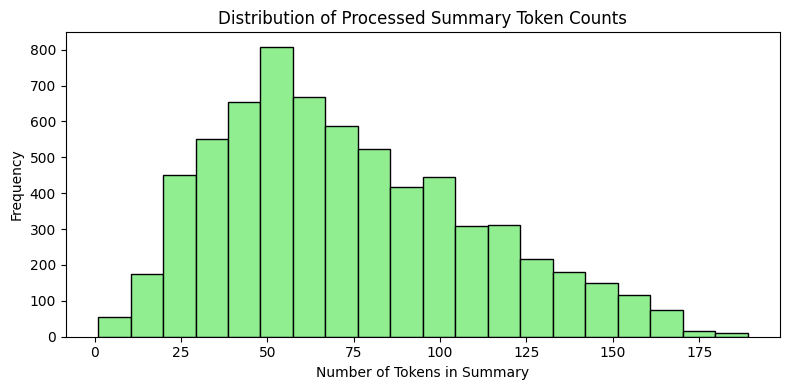

In [5]:
# -------------------------------------------------------------------
# Visualization 2: Distribution of Processed Summary Token Counts (Dataset 3)
# -------------------------------------------------------------------
summary_lengths = []
for year, papers in dataset3.items():
    for paper in papers:
        tokens = paper.get("processed_summary", [])
        summary_lengths.append(len(tokens))

plt.figure(figsize=(8,4))
plt.hist(summary_lengths, bins=20, color='lightgreen', edgecolor='black')
plt.xlabel("Number of Tokens in Summary")
plt.ylabel("Frequency")
plt.title("Distribution of Processed Summary Token Counts")
plt.tight_layout()
plt.show()

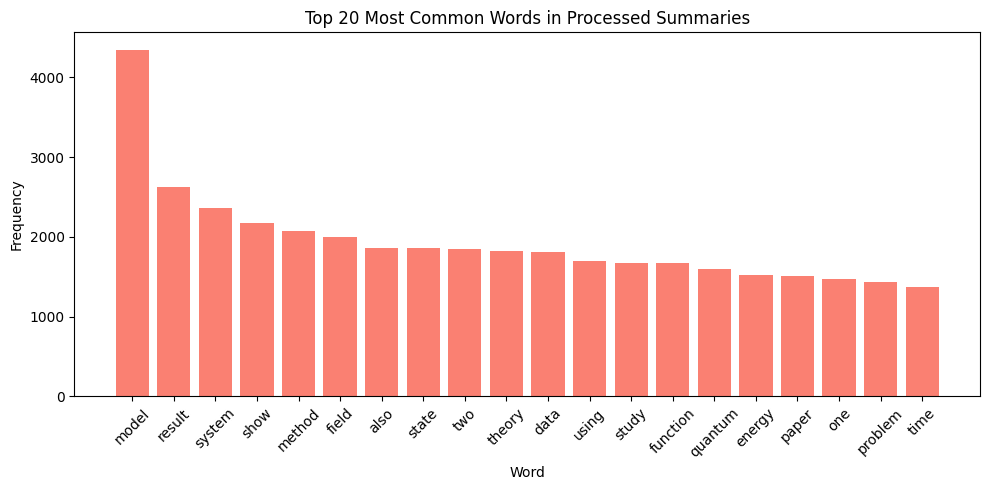

In [ ]:
# -------------------------------------------------------------------
# Visualization 3: Top 20 Most Common Words in Processed Summaries (Dataset 3)
# -------------------------------------------------------------------
word_counter = Counter()
for year, papers in dataset3.items():
    for paper in papers:
        tokens = paper.get("processed_summary", [])
        word_counter.update(tokens)

most_common = word_counter.most_common(20)
words, freq = zip(*most_common)

plt.figure(figsize=(10,5))
plt.bar(words, freq, color='salmon')
plt.xlabel("Word")
plt.ylabel("Frequency")
plt.title("Top 20 Most Common Words in Processed Summaries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [8]:
dataset4 = load_json("arxiv_march_data_with_processed_summary_and_pdf.json")


: 

In [ ]:
# -------------------------------------------------------------------
# Visualization 4: Distribution of Processed PDF Token Counts (Dataset 4)
# -------------------------------------------------------------------
pdf_lengths = []
for year, papers in dataset4.items():
    for paper in papers:
        tokens = paper.get("processed_pdf", [])
        if tokens:
            pdf_lengths.append(len(tokens))

if pdf_lengths:
    plt.figure(figsize=(8,4))
    plt.hist(pdf_lengths, bins=20, color='orchid', edgecolor='black')
    plt.xlabel("Number of Tokens in Processed PDF")
    plt.ylabel("Frequency")
    plt.title("Distribution of Processed PDF Token Counts")
    plt.tight_layout()
    plt.show()
else:
    print("No processed PDF data available for analysis.")

In [6]:
!pip install ijson



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


Processing year: 1991 (3 papers)
Processing year: 1992 (117 papers)
Processing year: 1993 (200 papers)
Processing year: 1994 (200 papers)
Processing year: 1995 (200 papers)
Processing year: 1996 (200 papers)
Processing year: 1997 (200 papers)
Processing year: 1998 (200 papers)
Processing year: 1999 (200 papers)
Processing year: 2000 (200 papers)
Processing year: 2001 (200 papers)
Processing year: 2002 (200 papers)
Processing year: 2003 (200 papers)
Processing year: 2004 (200 papers)
Processing year: 2005 (200 papers)
Processing year: 2006 (200 papers)
Processing year: 2007 (200 papers)
Processing year: 2008 (200 papers)
Processing year: 2009 (200 papers)
Processing year: 2010 (200 papers)
Processing year: 2011 (200 papers)
Processing year: 2012 (200 papers)
Processing year: 2013 (200 papers)
Processing year: 2014 (200 papers)
Processing year: 2015 (200 papers)
Processing year: 2016 (200 papers)
Processing year: 2017 (200 papers)
Processing year: 2018 (200 papers)
Processing year: 2019 

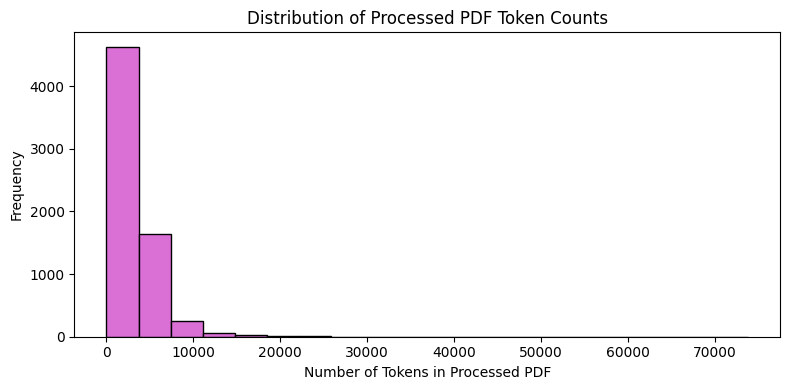

In [7]:
import ijson
import matplotlib.pyplot as plt

def get_pdf_token_lengths(filename):
    """
    Streams through the JSON file (assumed structure: { "year": [papers, ...], ... })
    and collects the length (number of tokens) of the 'processed_pdf' field for each paper.
    """
    lengths = []
    with open(filename, 'r', encoding='utf-8') as f:
        # Iterate over top-level key-value pairs (year and its corresponding list of papers)
        for year, papers in ijson.kvitems(f, ''):
            print(f"Processing year: {year} ({len(papers)} papers)")
            for paper in papers:
                tokens = paper.get("processed_pdf", [])
                if tokens:
                    lengths.append(len(tokens))
    return lengths

# Path to your large JSON dataset (Dataset 4)
filename = "data/arxiv_march_data_with_processed_summary_and_pdf.json"

# Get processed PDF token lengths incrementally
pdf_lengths = get_pdf_token_lengths(filename)

# Plot the distribution
plt.figure(figsize=(8,4))
plt.hist(pdf_lengths, bins=20, color='orchid', edgecolor='black')
plt.xlabel("Number of Tokens in Processed PDF")
plt.ylabel("Frequency")
plt.title("Distribution of Processed PDF Token Counts")
plt.tight_layout()
plt.show()


Processed year 1991: 3 papers.
Processed year 1992: 117 papers.
Processed year 1993: 200 papers.
Processed year 1994: 200 papers.
Processed year 1995: 200 papers.
Processed year 1996: 200 papers.
Processed year 1997: 200 papers.
Processed year 1998: 200 papers.
Processed year 1999: 200 papers.
Processed year 2000: 200 papers.
Processed year 2001: 200 papers.
Processed year 2002: 200 papers.
Processed year 2003: 200 papers.
Processed year 2004: 200 papers.
Processed year 2005: 200 papers.
Processed year 2006: 200 papers.
Processed year 2007: 200 papers.
Processed year 2008: 200 papers.
Processed year 2009: 200 papers.
Processed year 2010: 200 papers.
Processed year 2011: 200 papers.
Processed year 2012: 200 papers.
Processed year 2013: 200 papers.
Processed year 2014: 200 papers.
Processed year 2015: 200 papers.
Processed year 2016: 200 papers.
Processed year 2017: 200 papers.
Processed year 2018: 200 papers.
Processed year 2019: 200 papers.
Processed year 2020: 200 papers.
Processed ye

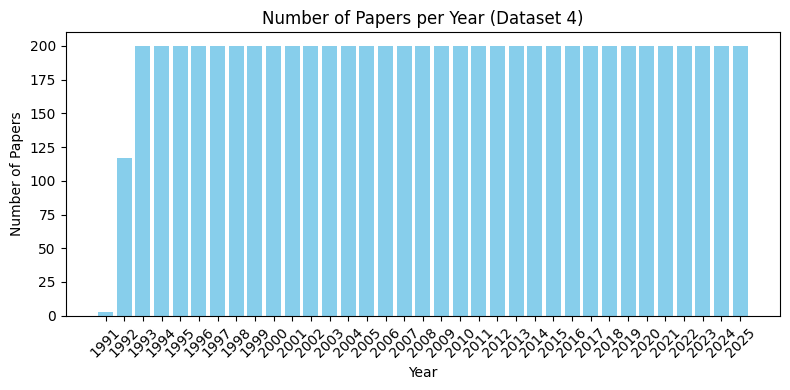

In [10]:
# File path for Dataset 4
filename = os.path.join("data", "arxiv_march_data_with_processed_summary_and_pdf.json")

# Initialize a dictionary to hold paper counts per year
paper_counts = {}

# Use ijson to stream through the top-level key-value pairs.
# Assuming the JSON is a dictionary where keys are years.
with open(filename, "r", encoding="utf-8") as f:
    # kvitems returns (key, value) pairs for the given prefix (here, the top-level '')
    for year, papers in ijson.kvitems(f, ""):
        # For each year, count the number of papers (assuming 'papers' is a list)
        paper_counts[year] = len(papers)
        print(f"Processed year {year}: {paper_counts[year]} papers.")

# Print the results
print("\nNumber of Papers per Year (Dataset 4):")
for year in sorted(paper_counts.keys()):
    print(f"Year {year}: {paper_counts[year]}")

# Plot a bar chart of the counts
years_sorted = sorted(paper_counts.keys())
counts = [paper_counts[year] for year in years_sorted]

plt.figure(figsize=(8, 4))
plt.bar(years_sorted, counts, color='skyblue')
plt.xlabel("Year")
plt.ylabel("Number of Papers")
plt.title("Number of Papers per Year (Dataset 4)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

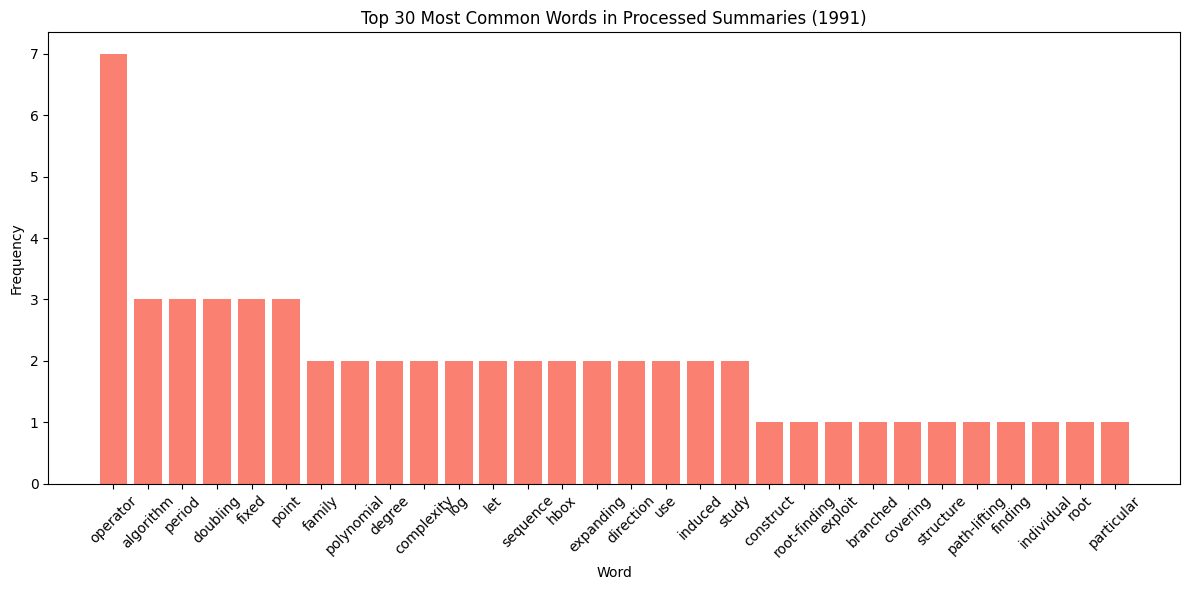

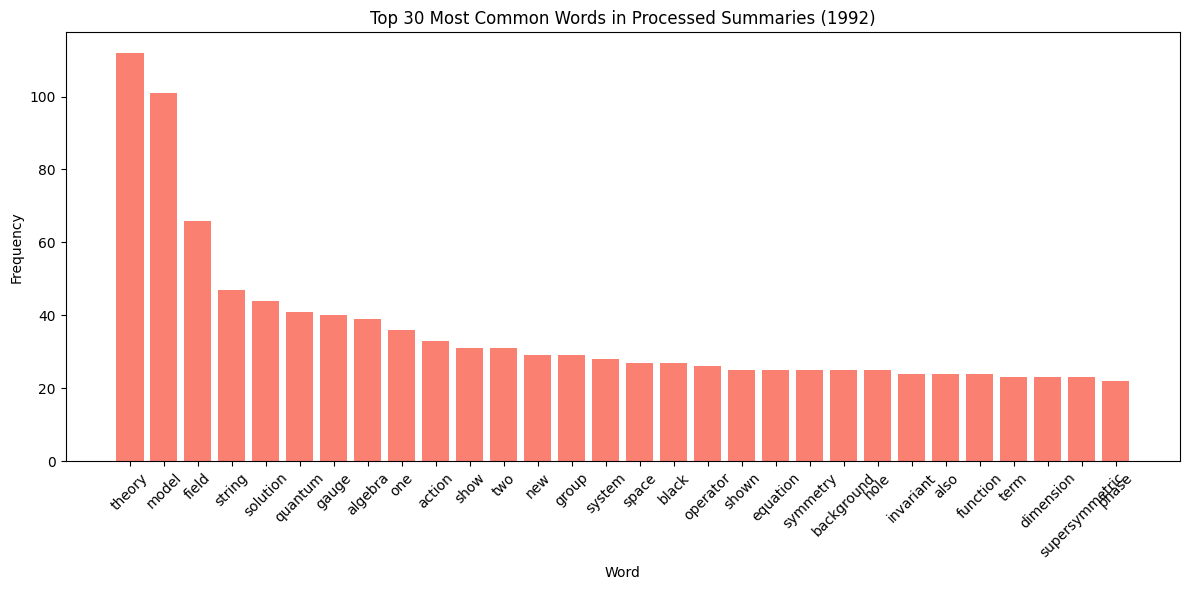

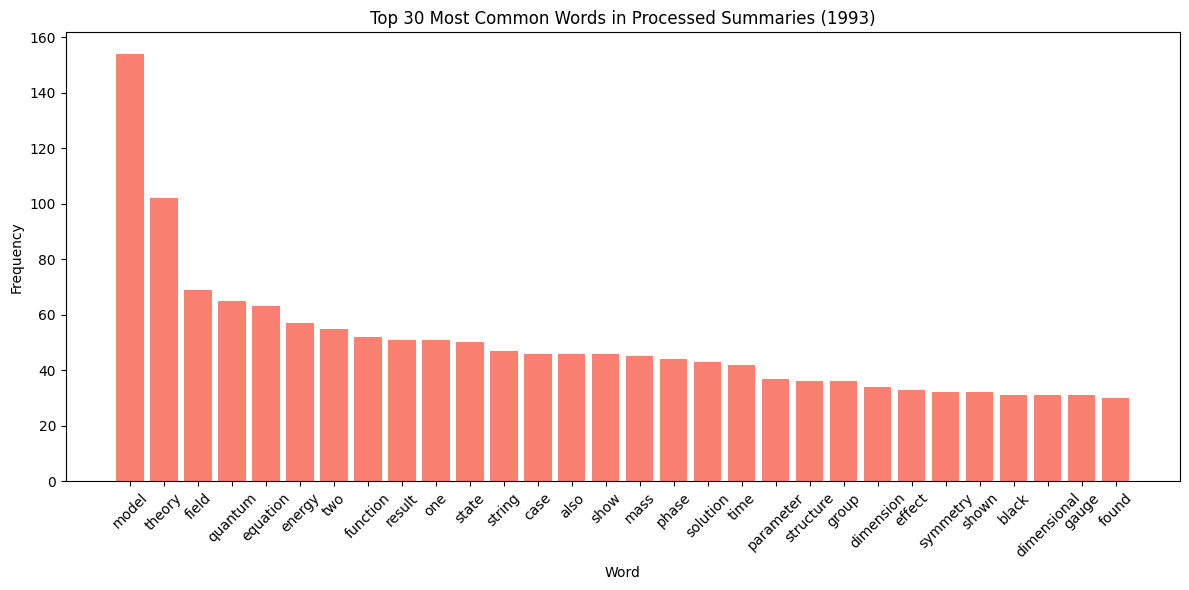

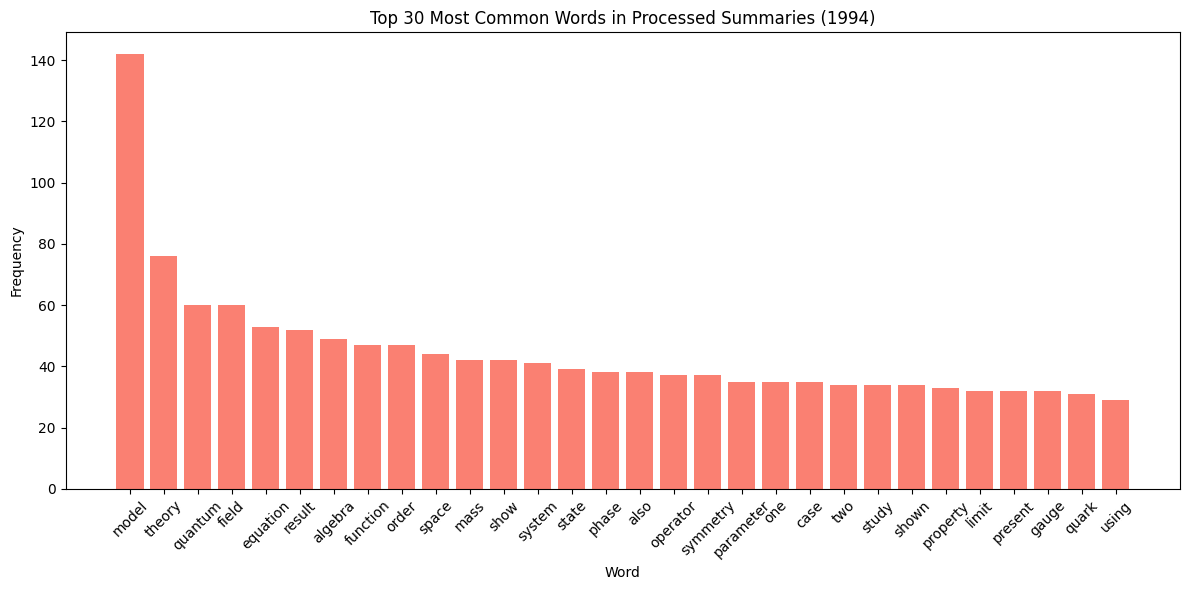

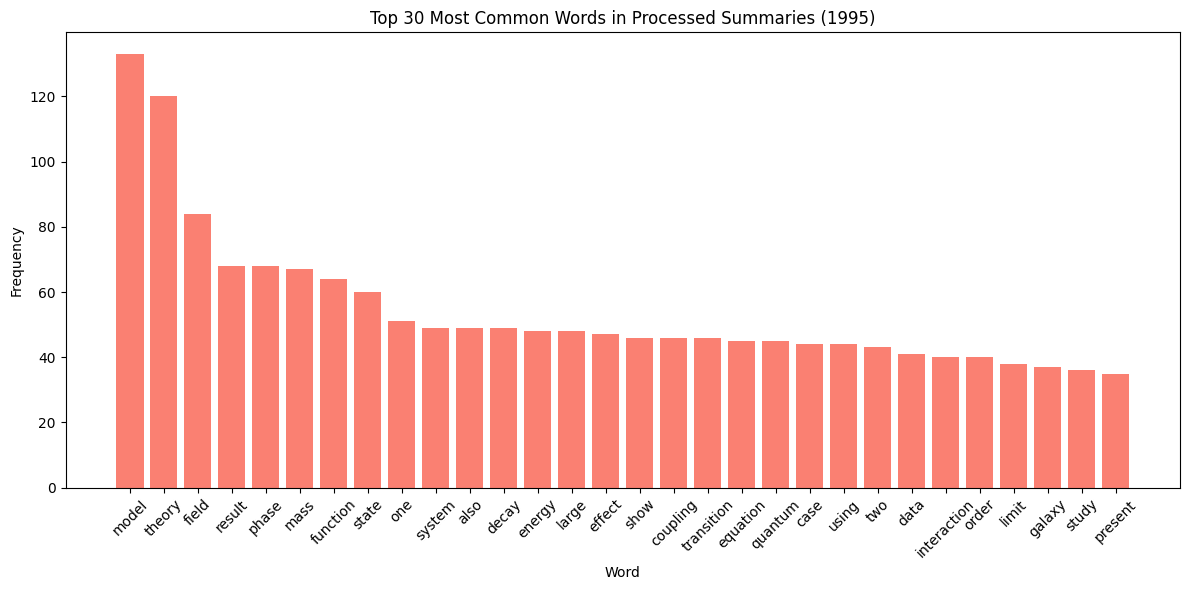

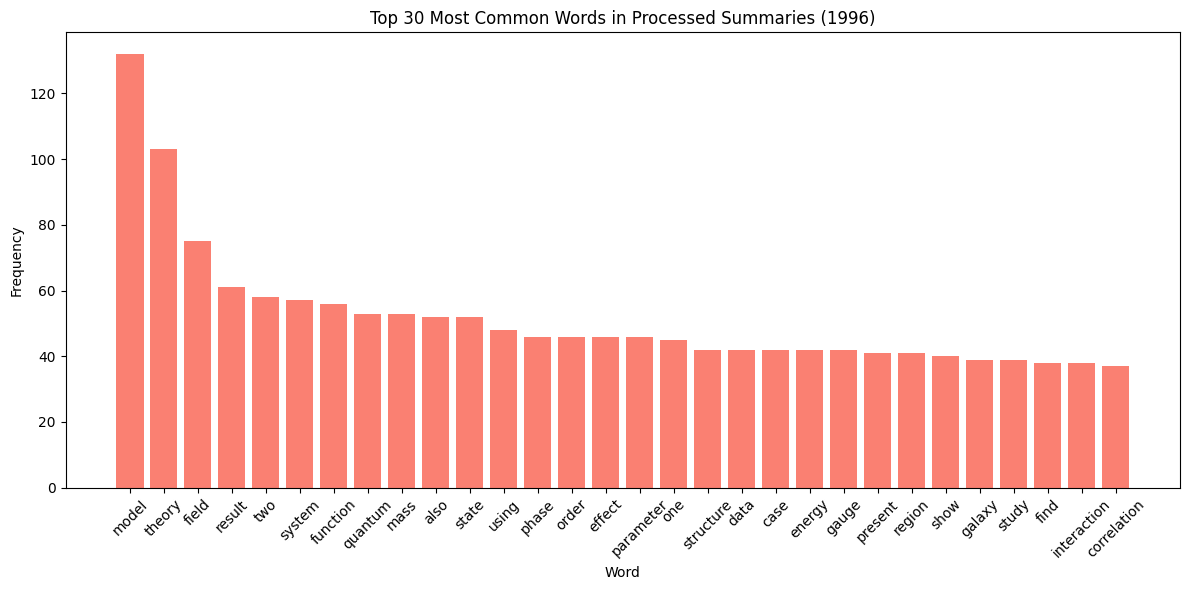

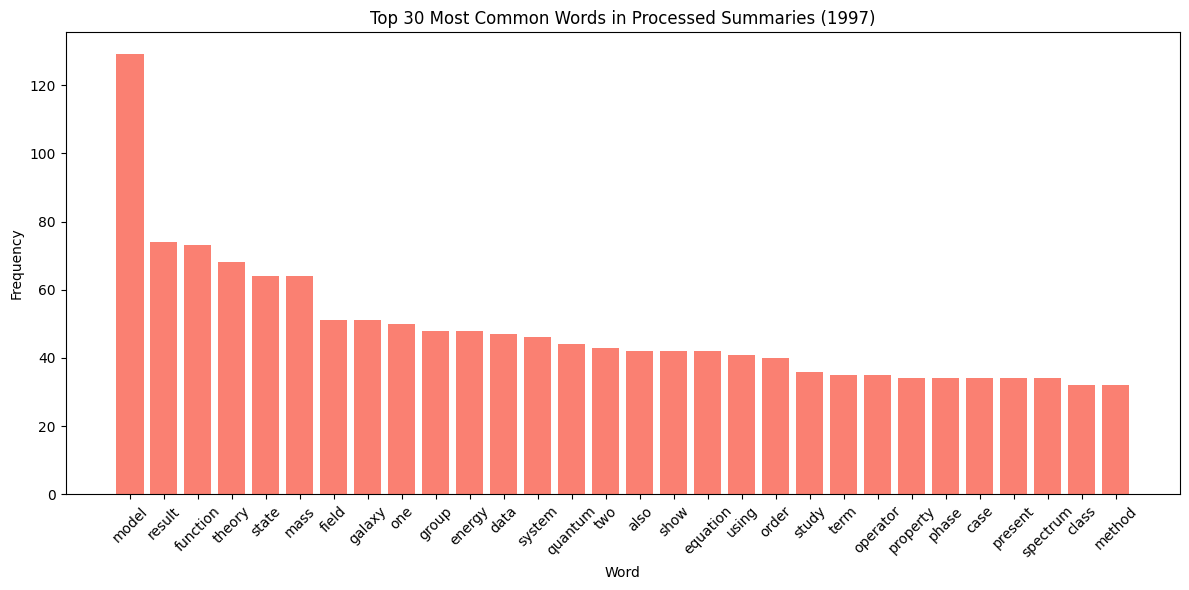

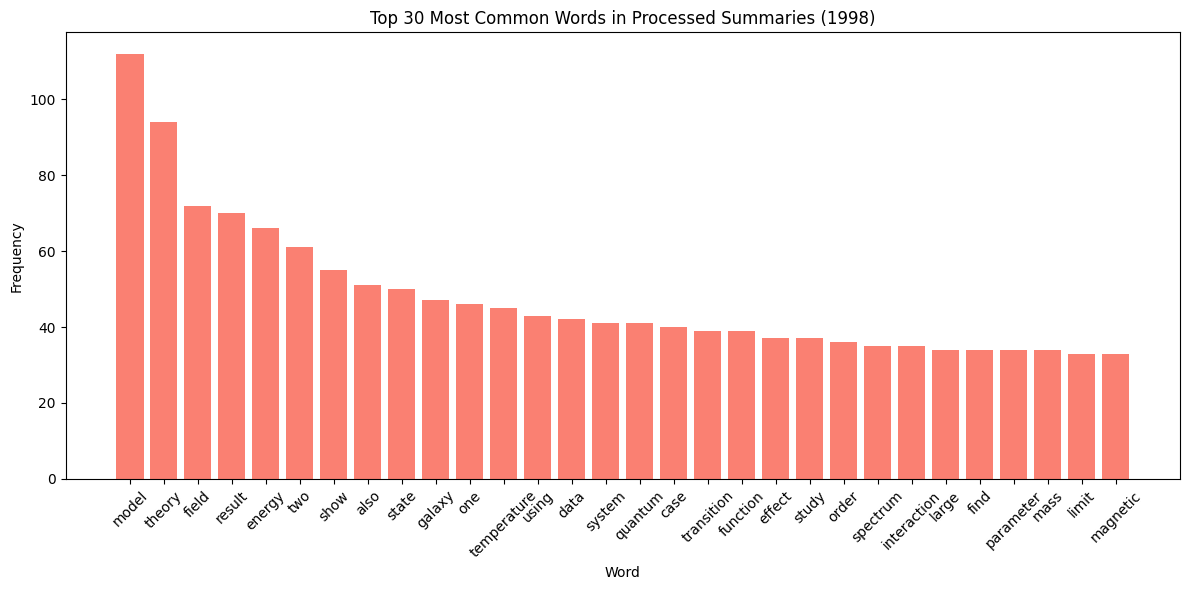

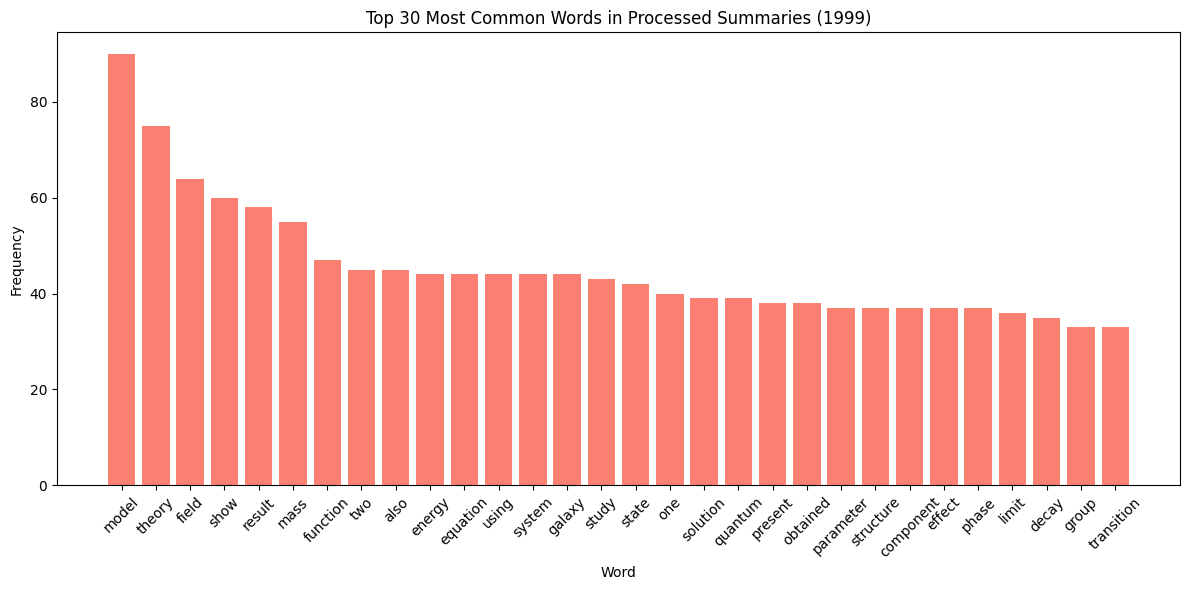

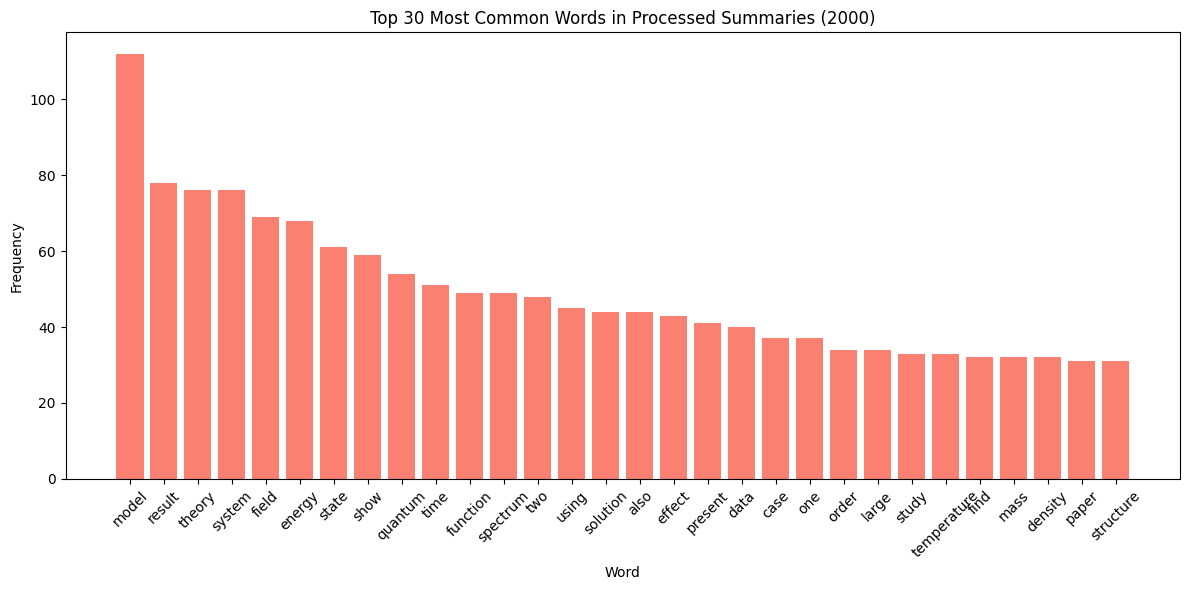

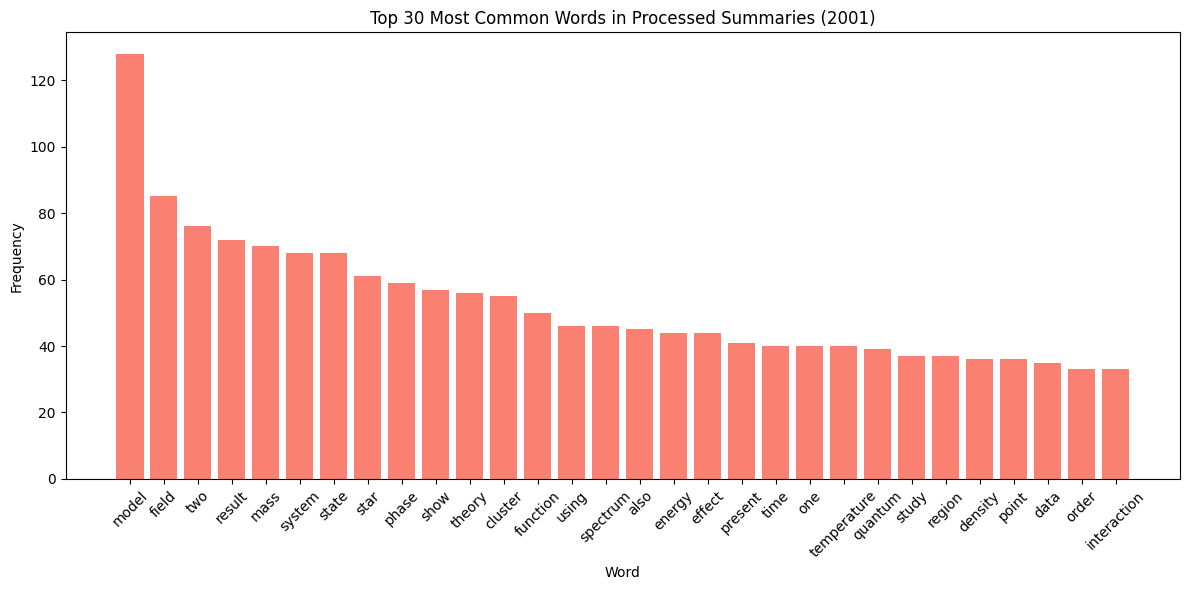

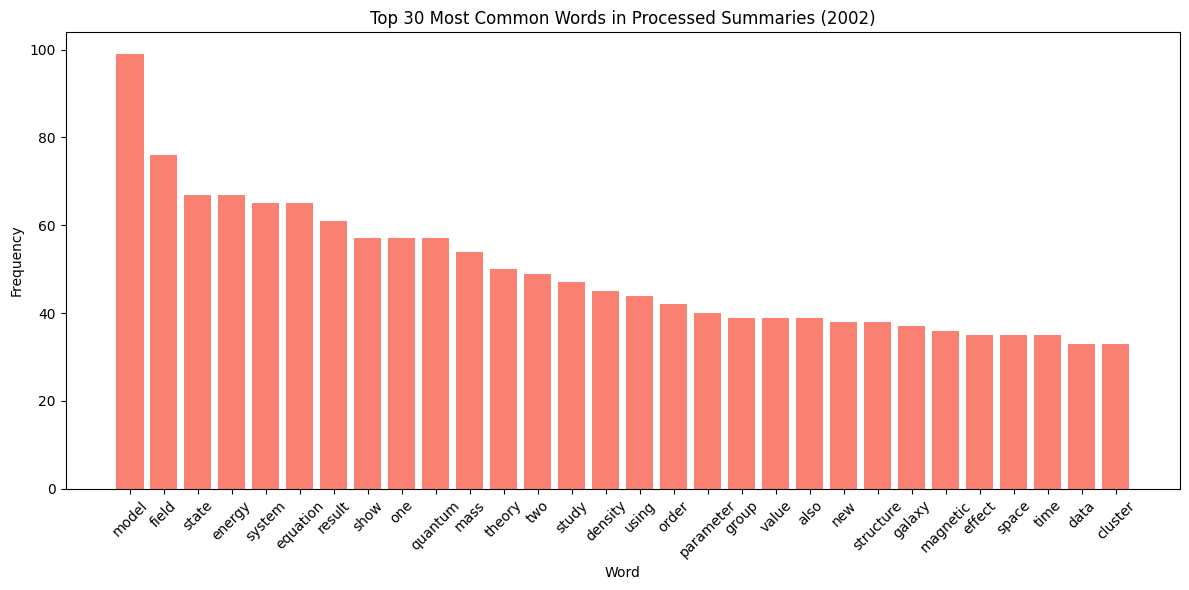

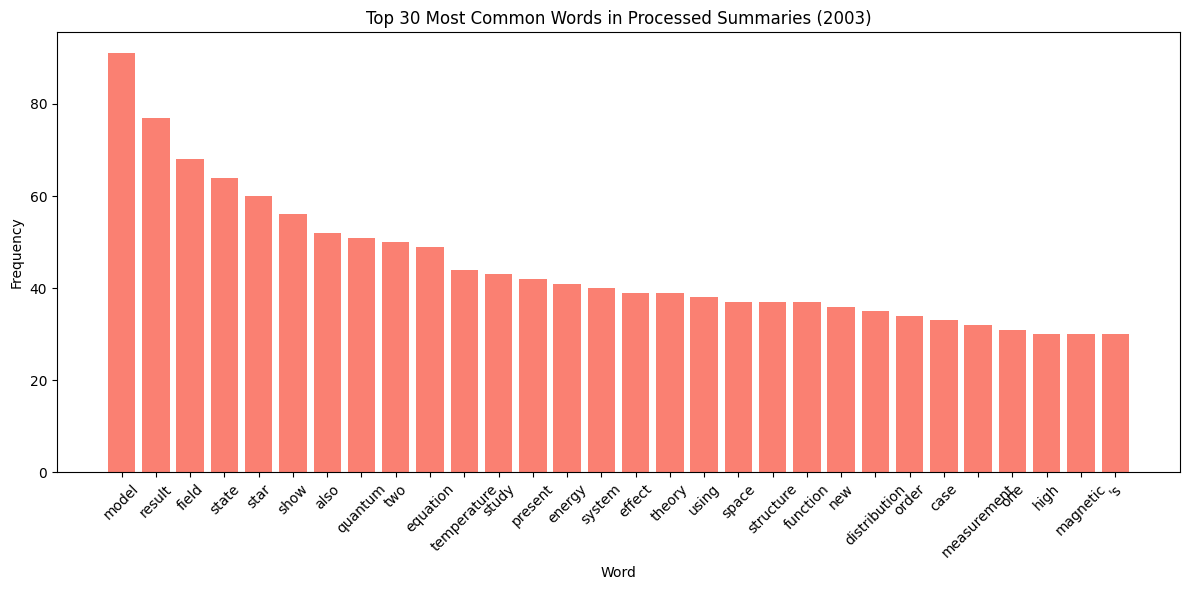

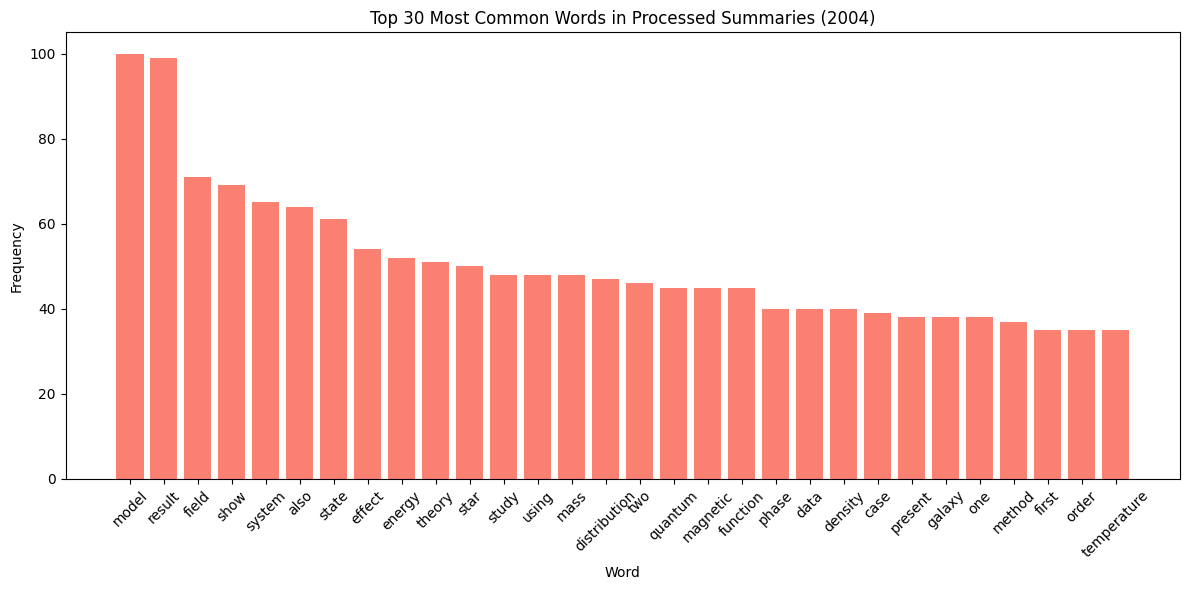

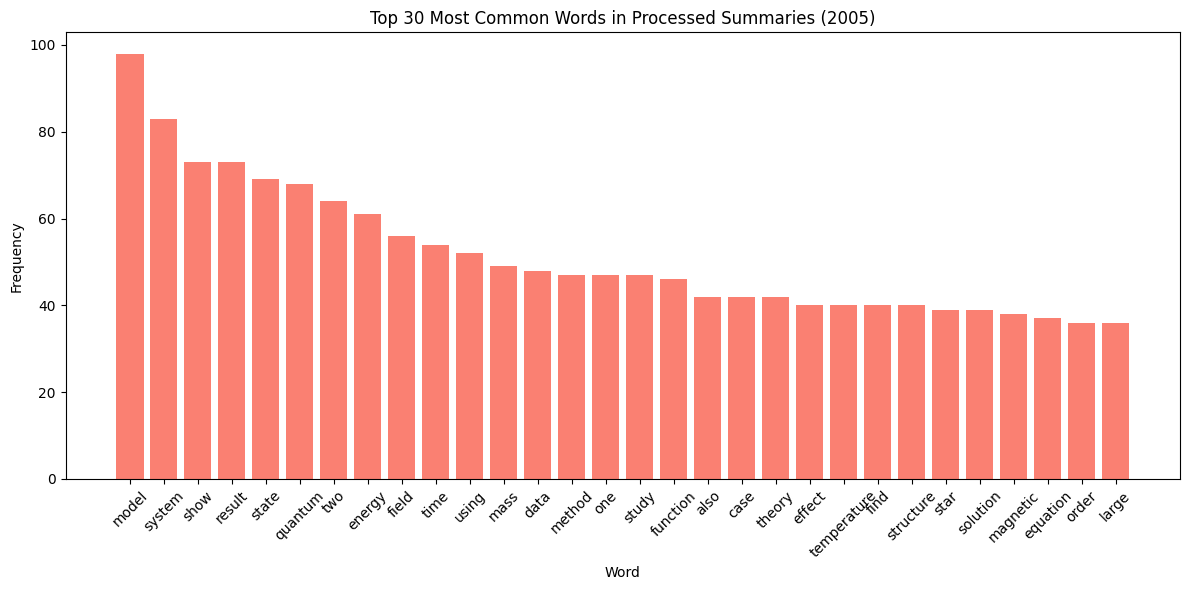

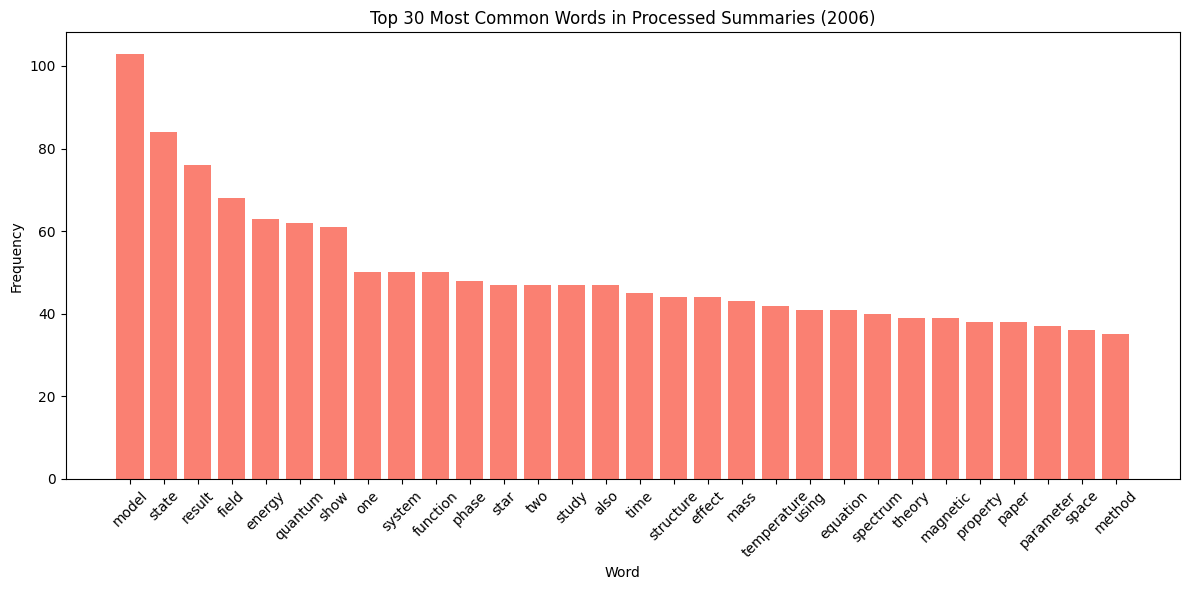

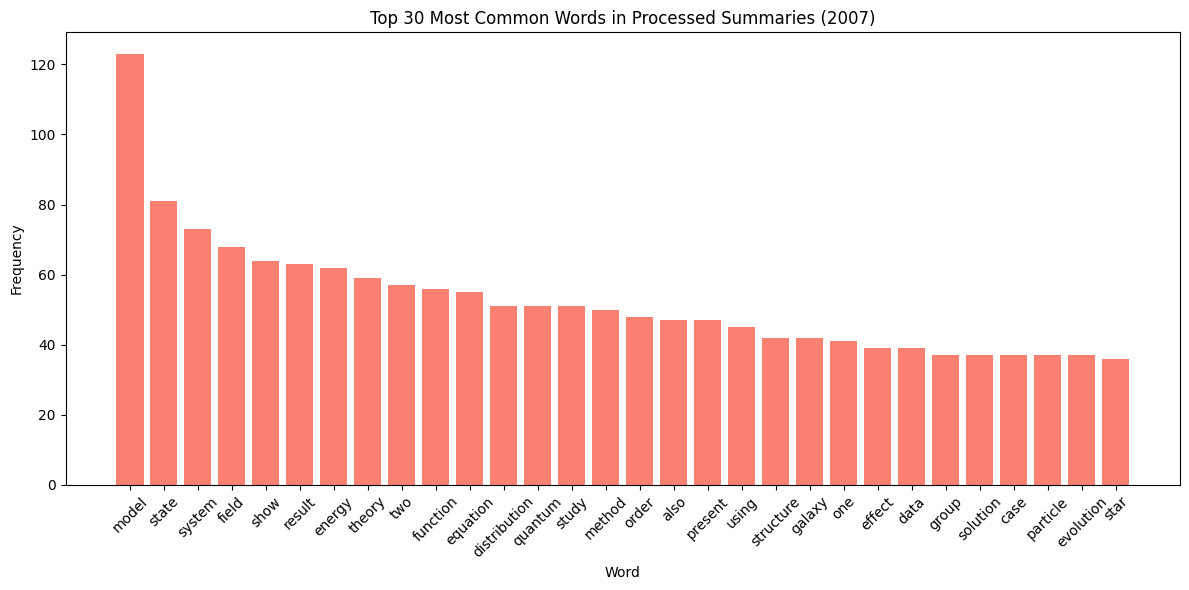

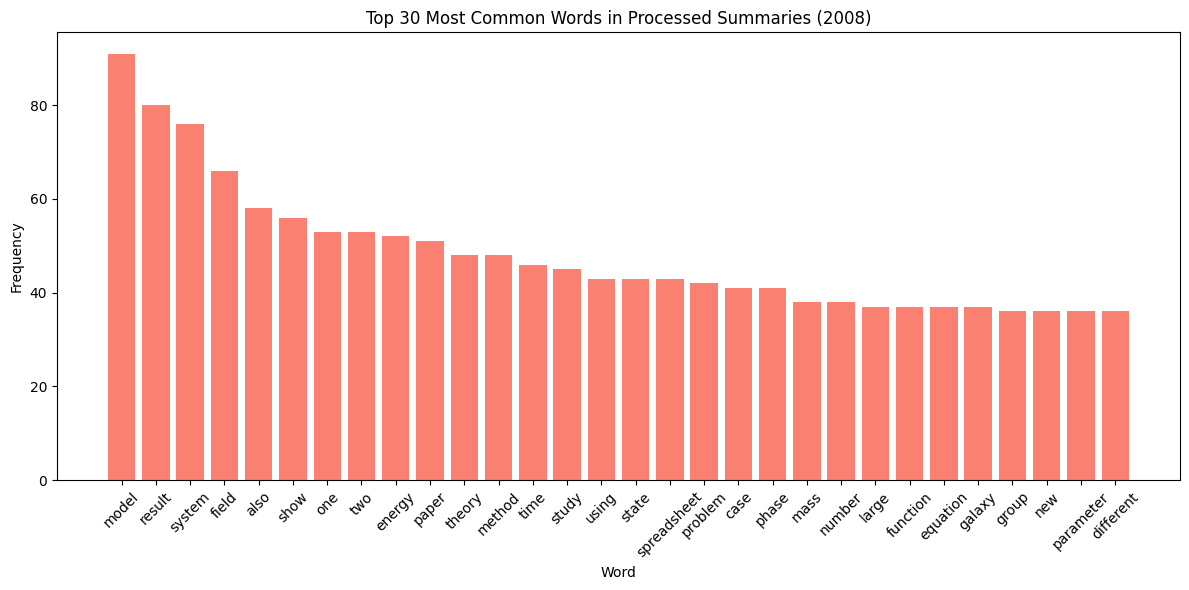

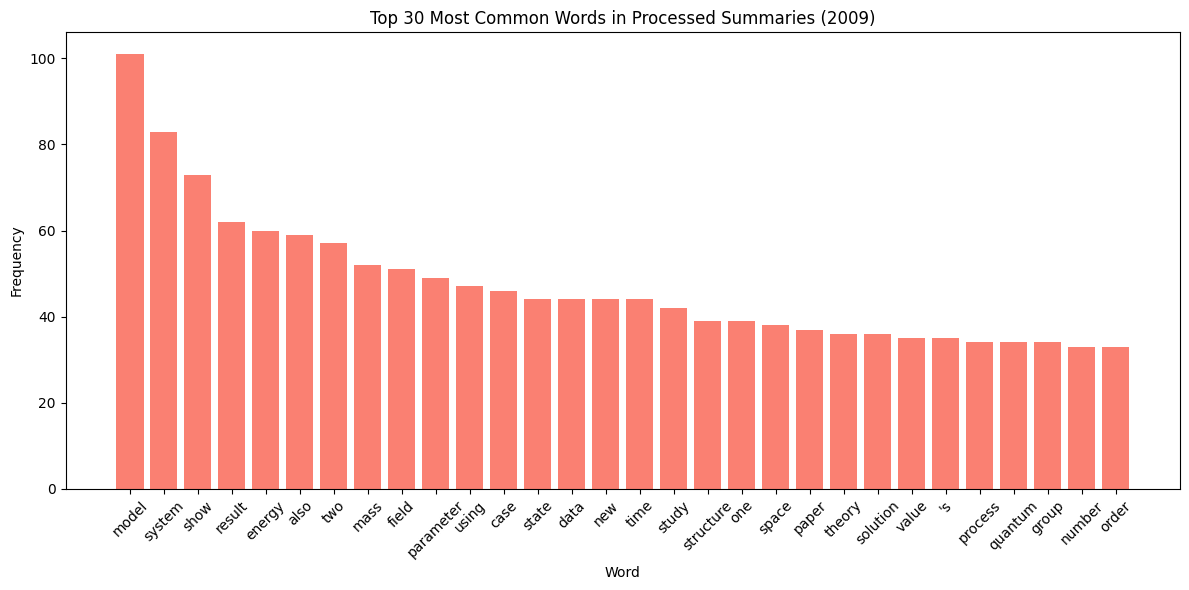

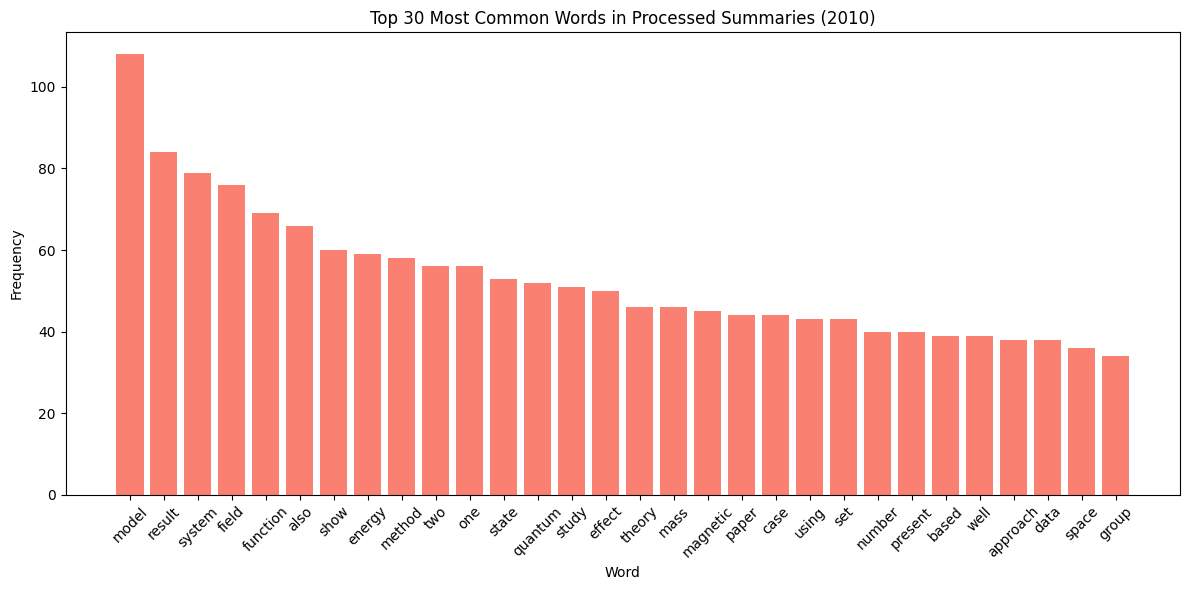

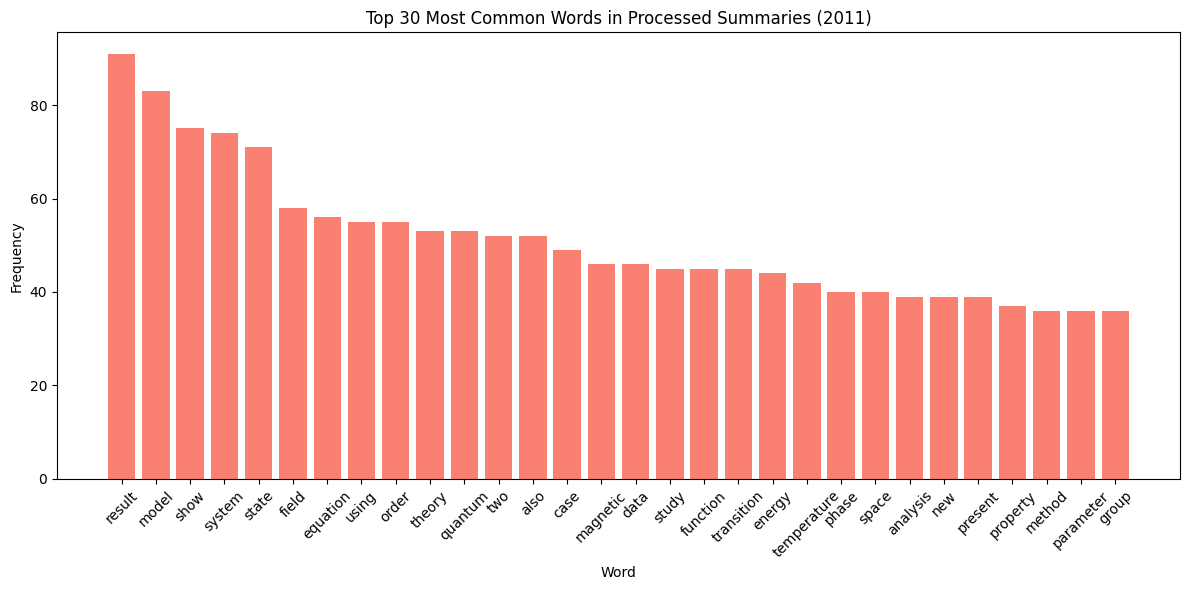

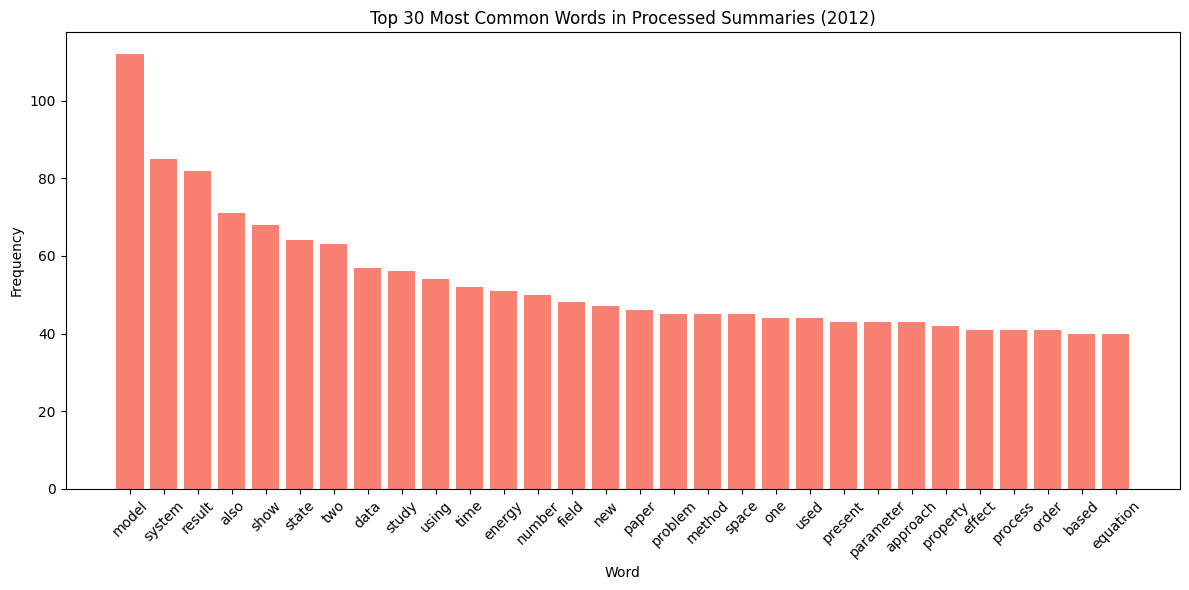

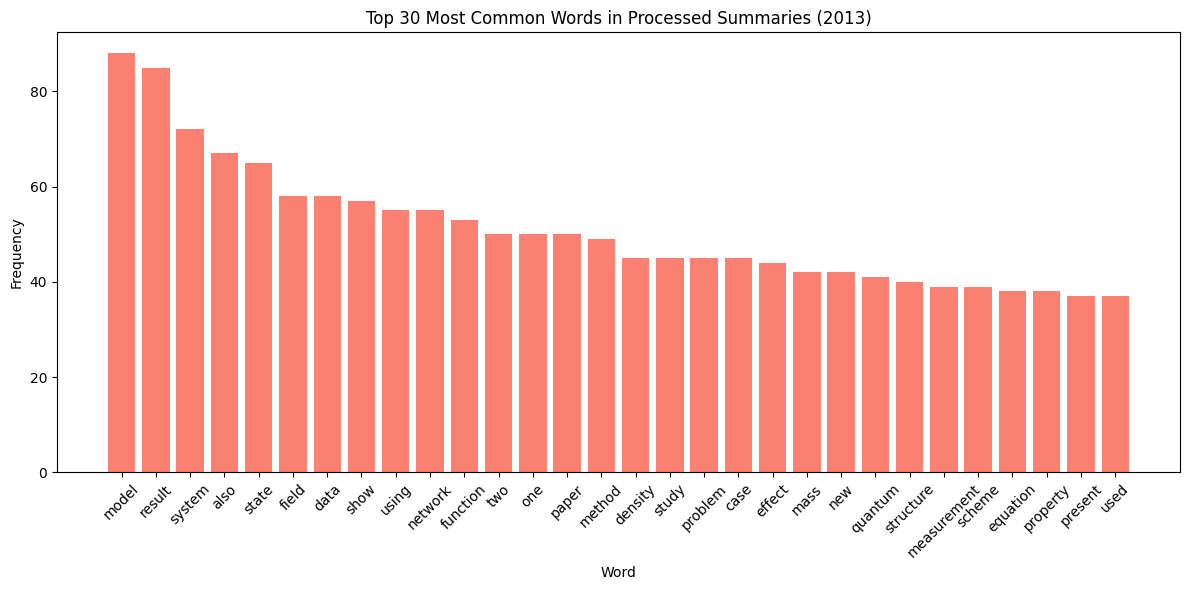

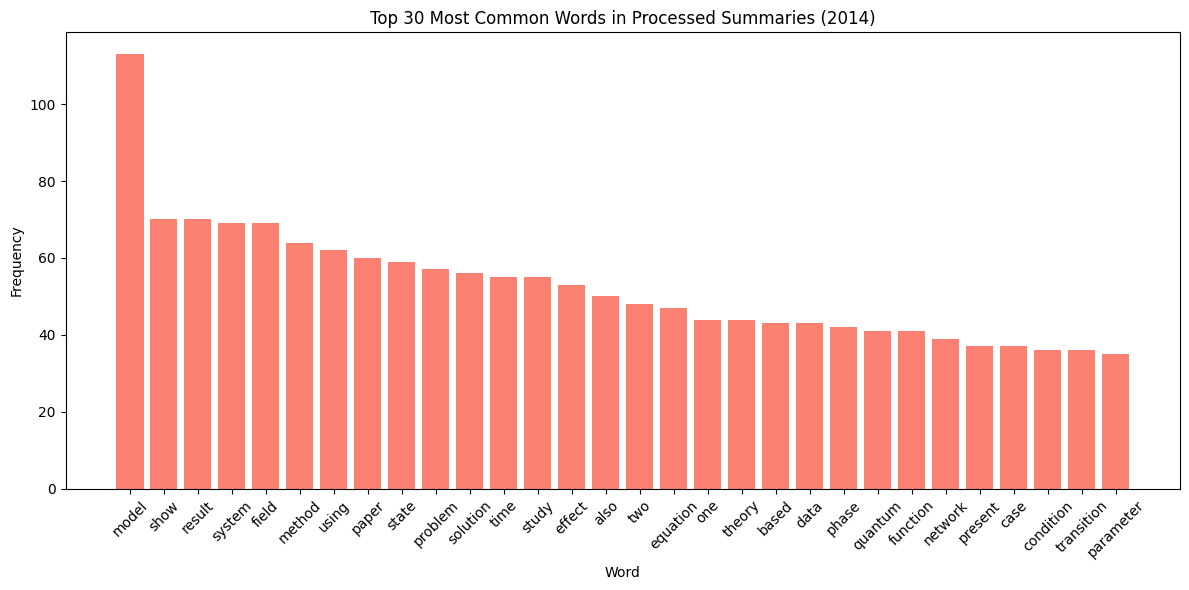

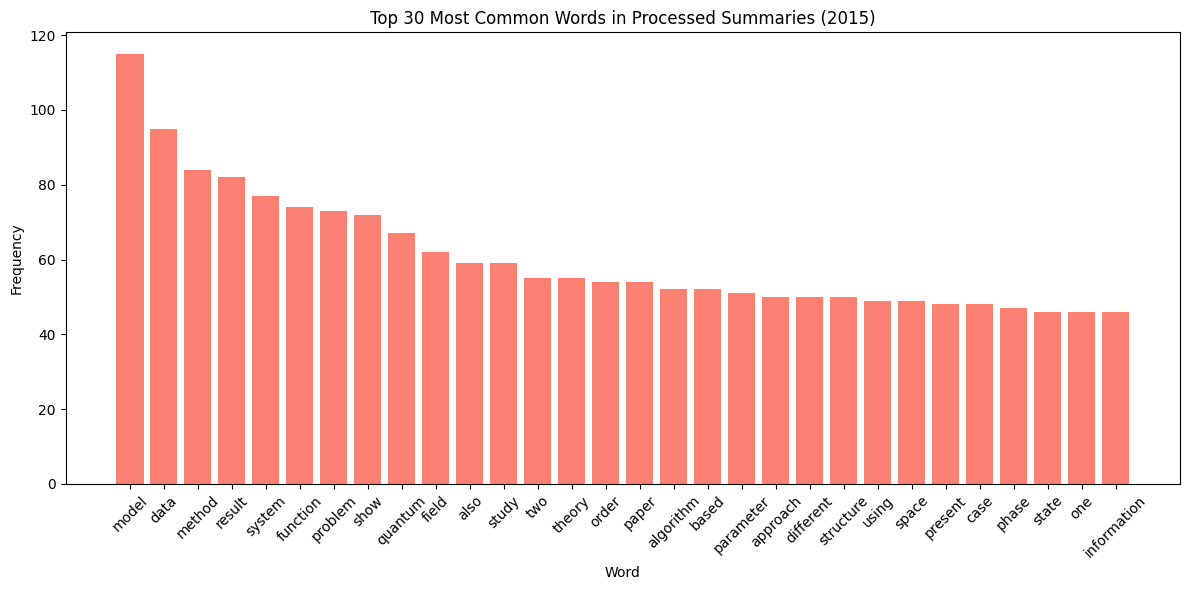

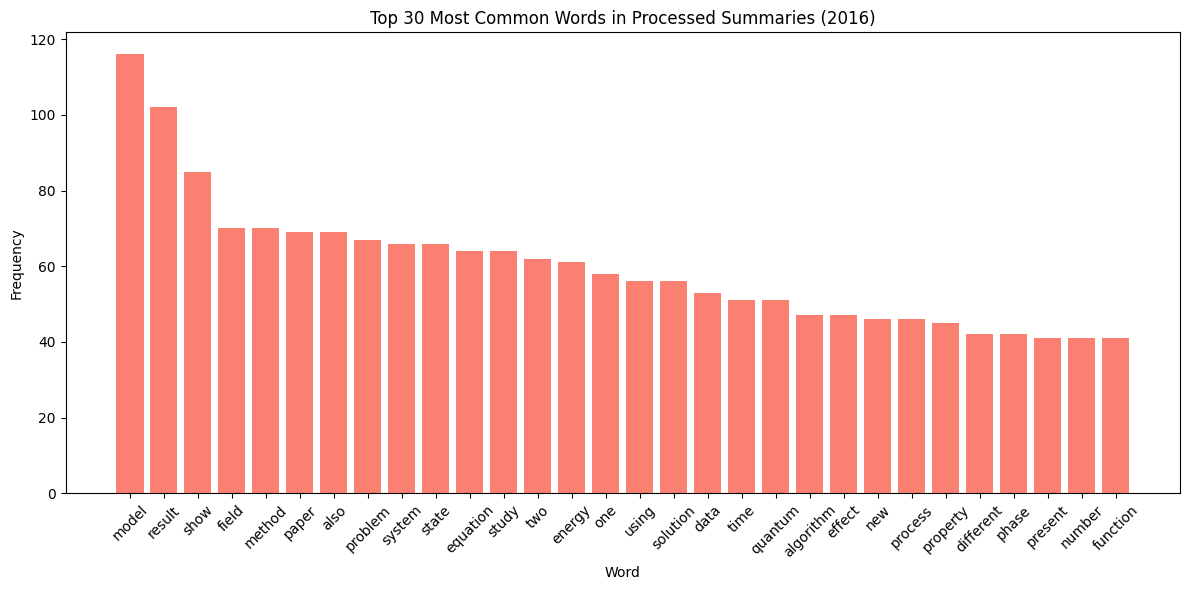

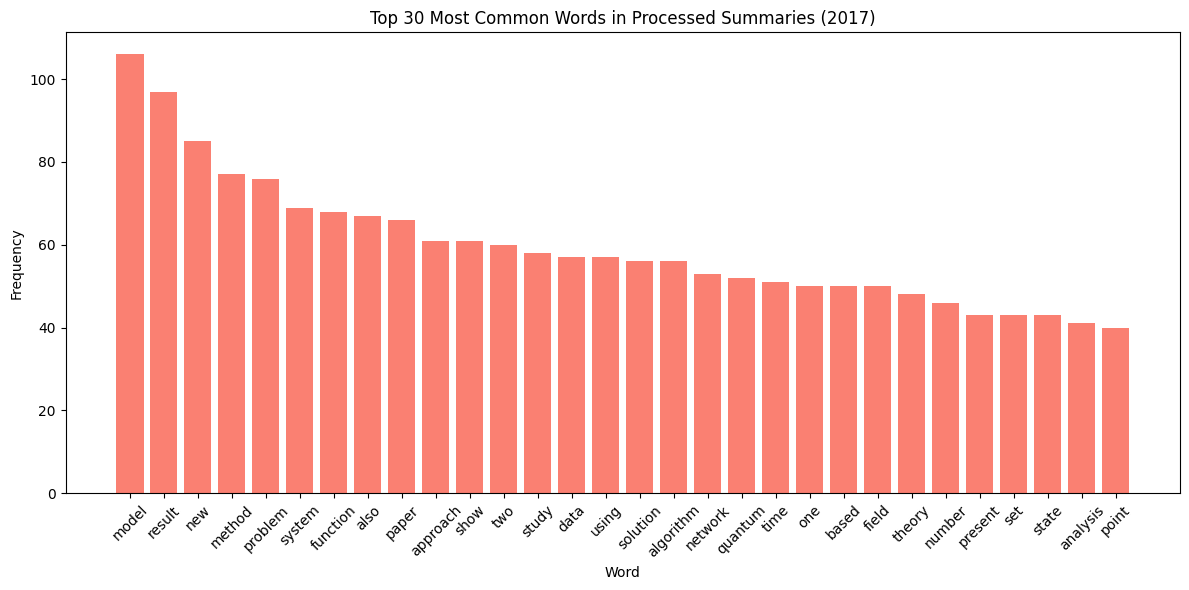

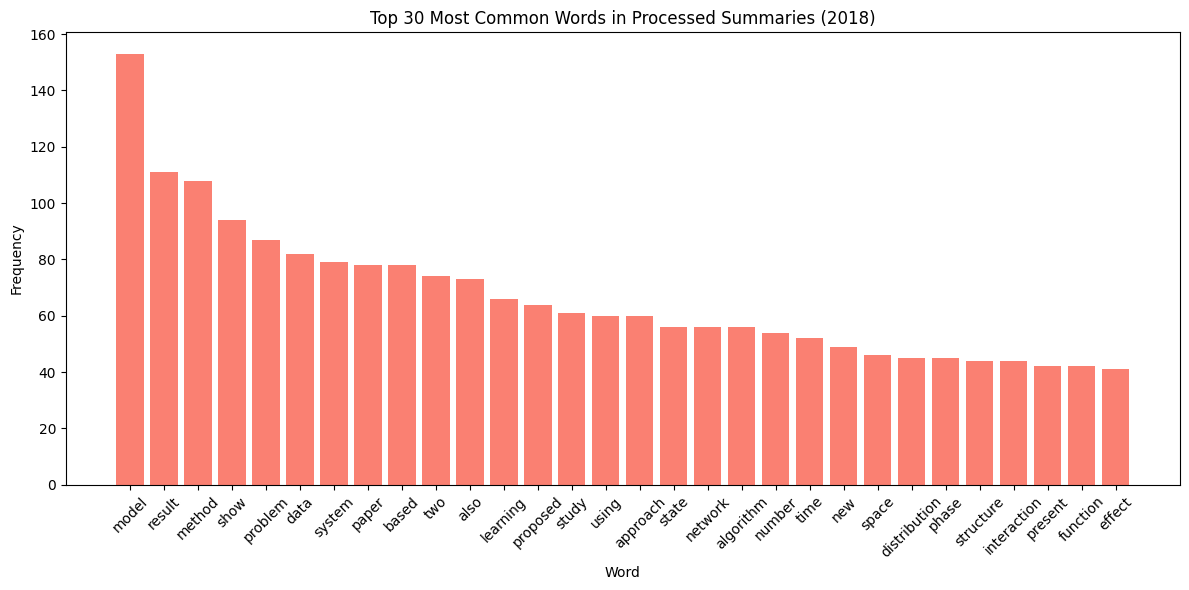

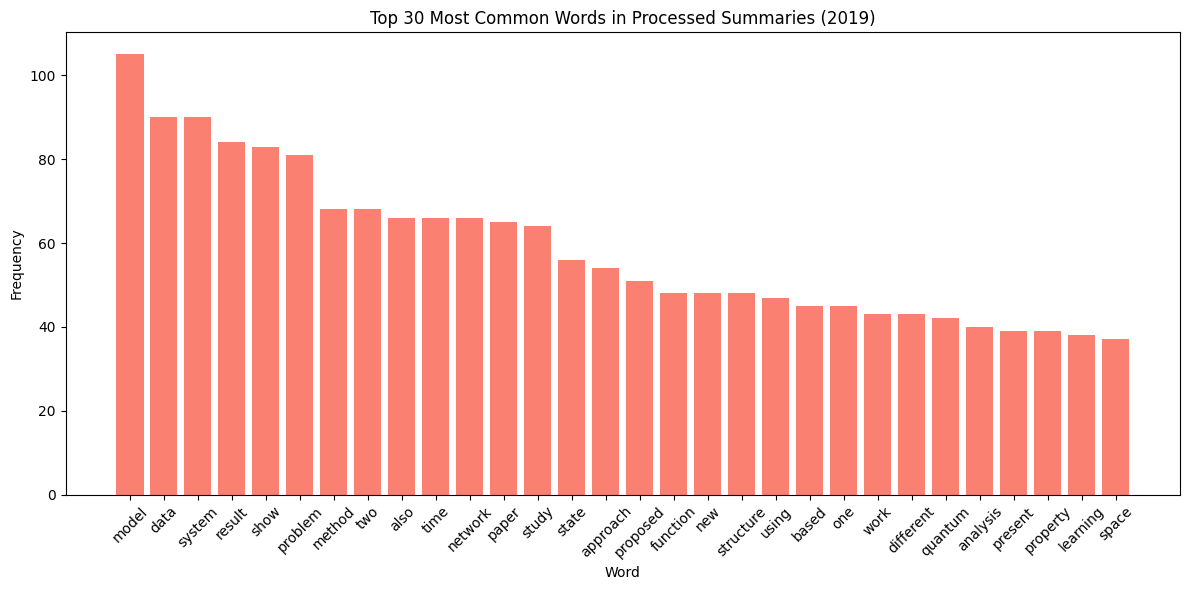

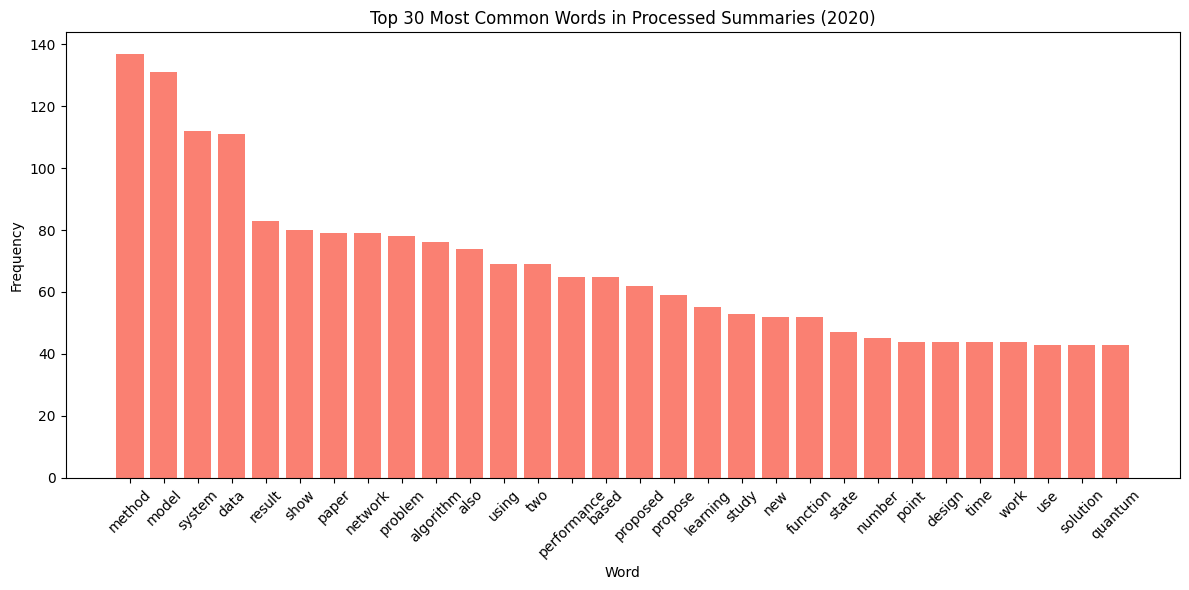

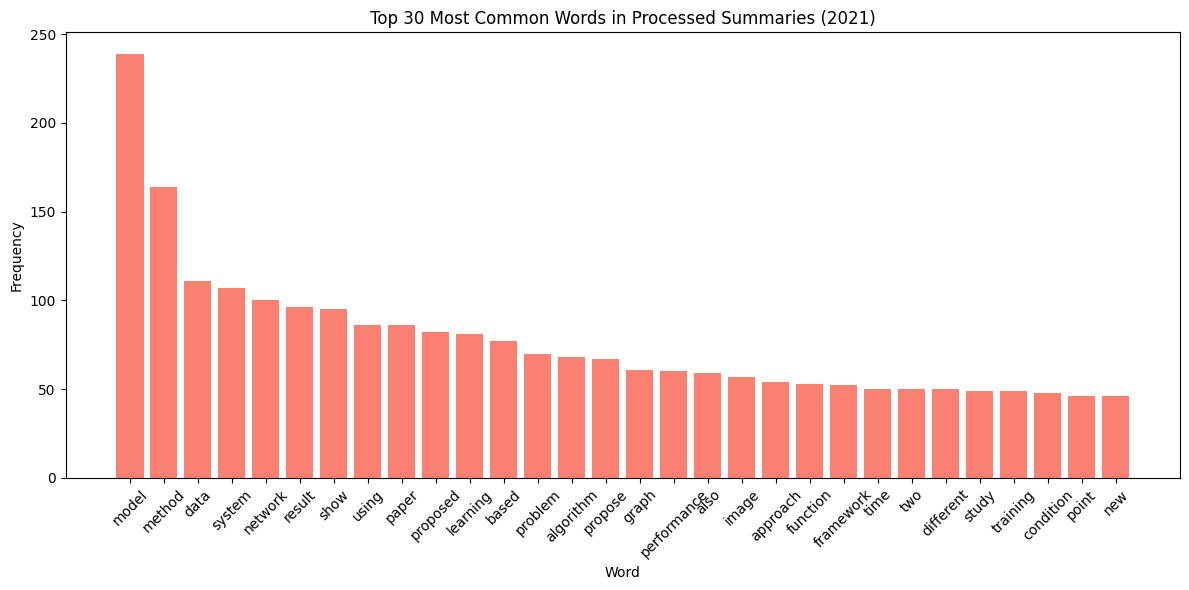

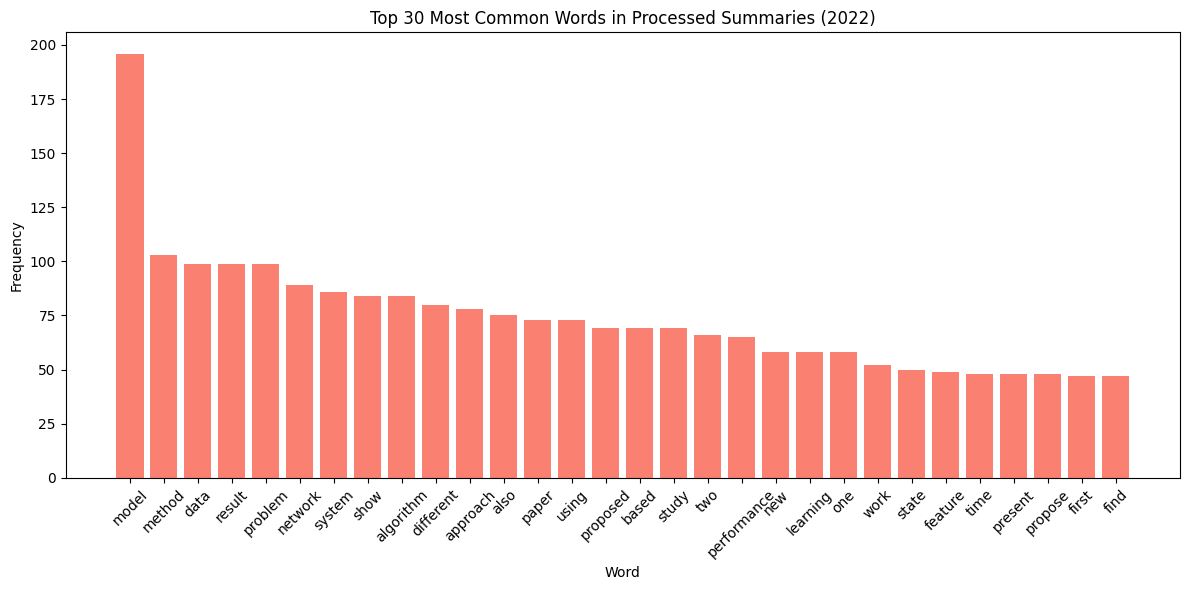

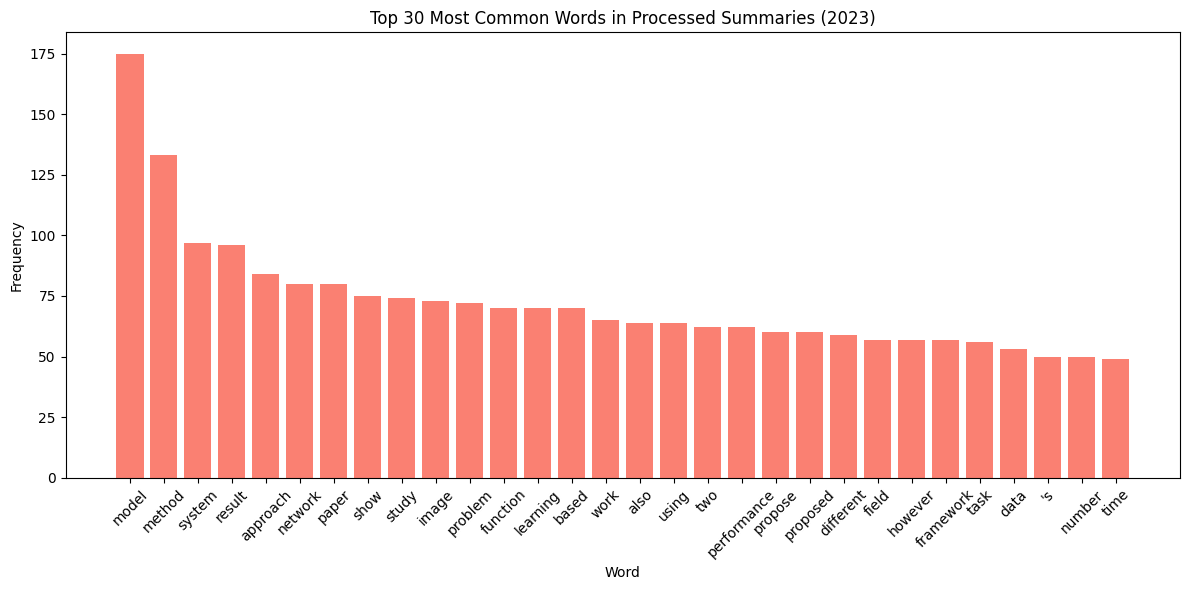

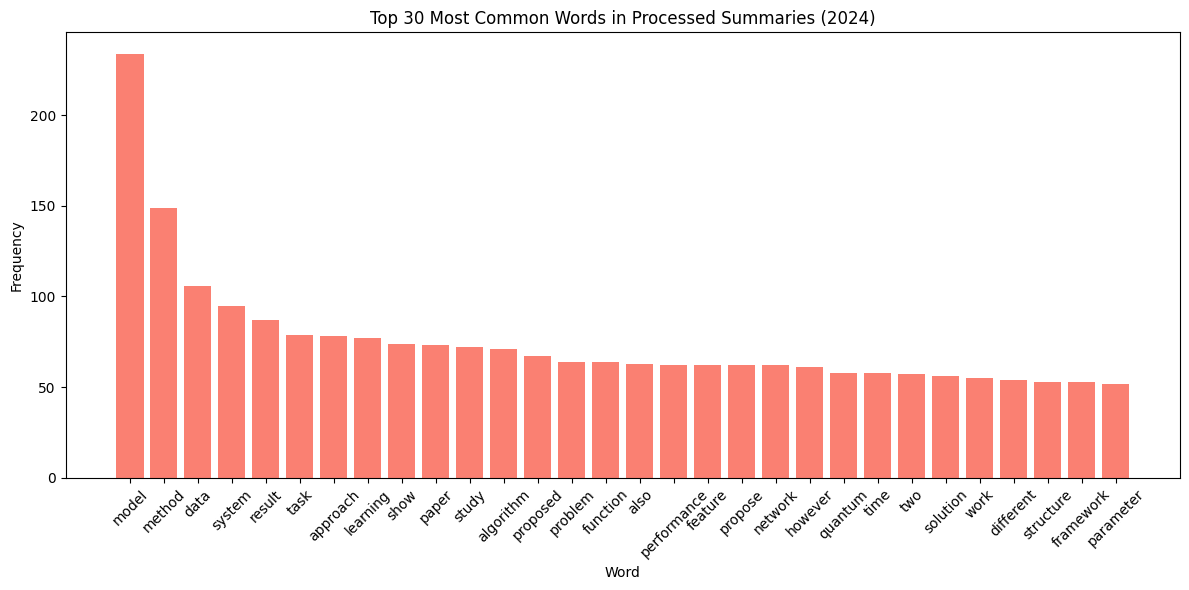

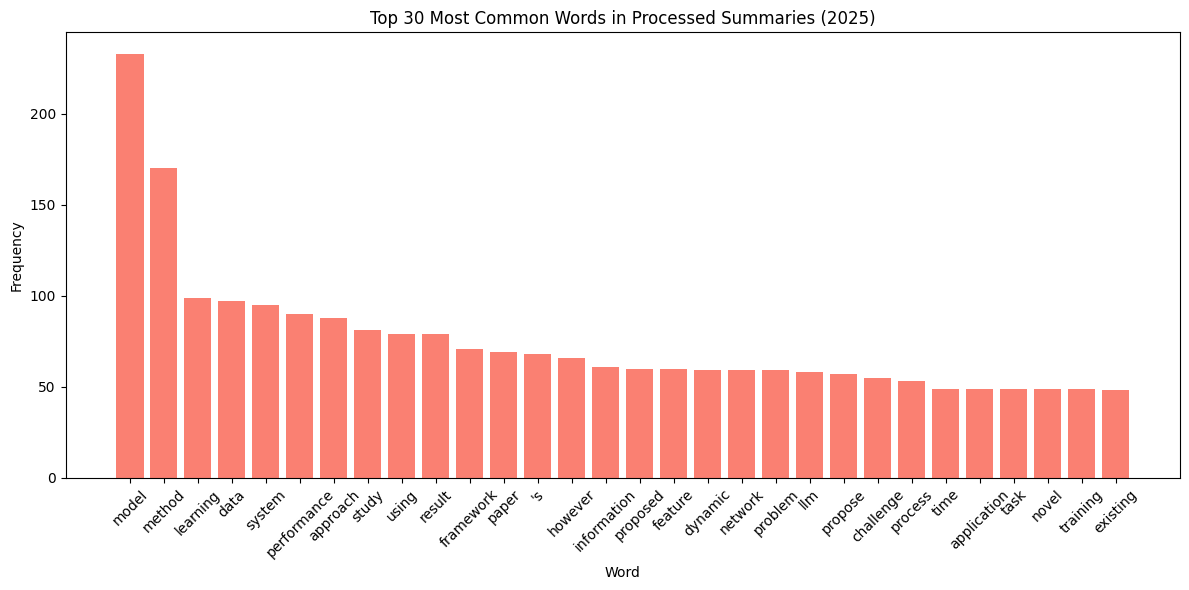

In [11]:
import matplotlib.pyplot as plt
from collections import Counter

# Assume dataset3 is already loaded from "data/arxiv_march_data_with_processed_summary.json"
# For example:
# with open("data/arxiv_march_data_with_processed_summary.json", "r", encoding="utf-8") as f:
#     dataset3 = json.load(f)

# Loop through each year in the dataset
for year in sorted(dataset3.keys()):
    word_counter = Counter()
    for paper in dataset3[year]:
        tokens = paper.get("processed_summary", [])
        word_counter.update(tokens)
    
    # Get the top 30 most common words for this year
    most_common = word_counter.most_common(30)
    
    # Only plot if there are tokens for the year
    if most_common:
        words, freq = zip(*most_common)
    else:
        words, freq = [], []
    
    plt.figure(figsize=(12, 6))
    plt.bar(words, freq, color='salmon')
    plt.xlabel("Word")
    plt.ylabel("Frequency")
    plt.title(f"Top 30 Most Common Words in Processed Summaries ({year})")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


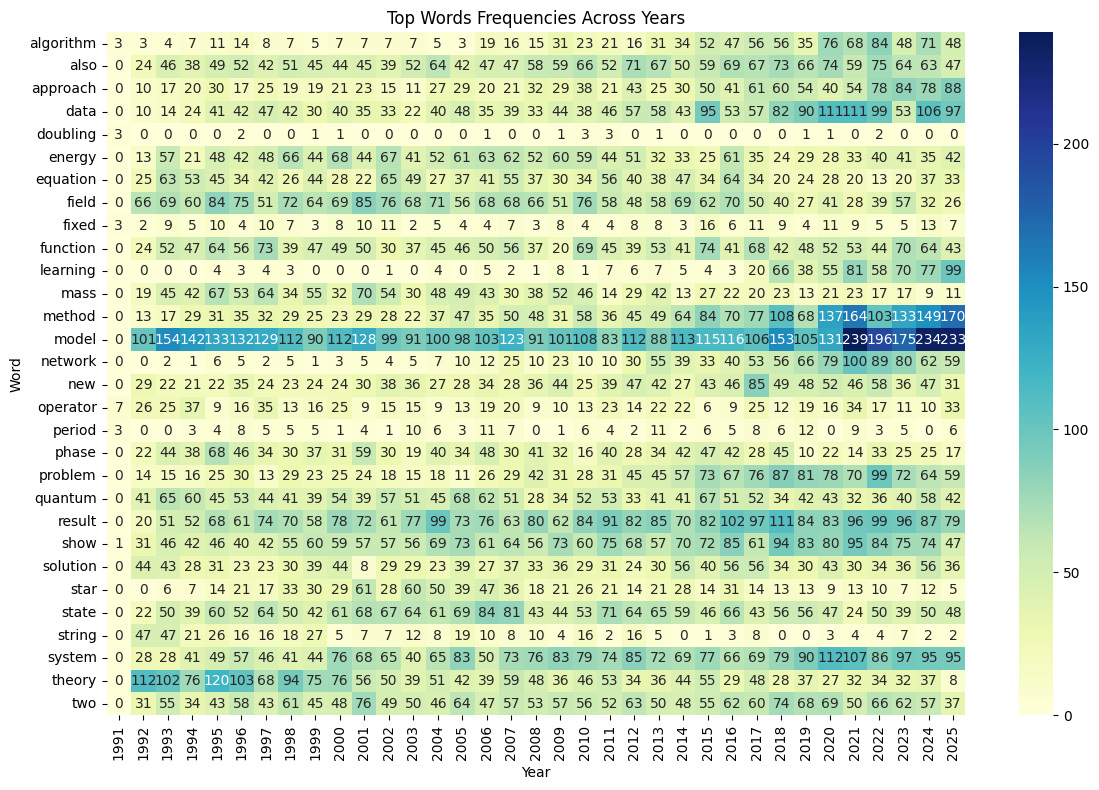

In [15]:
# Helper function to load JSON data from the "data" directory
def load_json(filename):
    filepath = os.path.join("data", filename)
    with open(filepath, "r", encoding="utf-8") as f:
        return json.load(f)

# Load Dataset 3 (processed summaries)
dataset3 = load_json("arxiv_march_data_with_processed_summary.json")

# Get list of years (sorted)
years = sorted(dataset3.keys())

# Compute a Counter for each year based on processed_summary tokens
year_counters = {}
for year in years:
    counter = Counter()
    for paper in dataset3[year]:
        tokens = paper.get("processed_summary", [])
        counter.update(tokens)
    year_counters[year] = counter

# For each year, extract the top 10 words and take the union across all years
top_words_set = set()
for year in years:
    top_words = [word for word, _ in year_counters[year].most_common(5)]
    top_words_set.update(top_words)
top_words = sorted(list(top_words_set))  # Sorted list of words

# Build a matrix: rows are top words, columns are years.
matrix = np.zeros((len(top_words), len(years)))
for j, year in enumerate(years):
    for i, word in enumerate(top_words):
        matrix[i, j] = year_counters[year].get(word, 0)

# Create a heatmap to visualize the frequencies
plt.figure(figsize=(12, 8))
sns.heatmap(matrix, annot=True, fmt=".0f", cmap="YlGnBu", 
            xticklabels=years, yticklabels=top_words)
plt.xlabel("Year")
plt.ylabel("Word")
plt.title("Top Words Frequencies Across Years")
plt.tight_layout()
plt.show()